In [1]:
%matplotlib notebook 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
class Flock(object):
    """Represents the N-birds configuration at a given moment, in 2D. Birds are flocking in a square of side L
    with periodic boundary conditions. Birds' positions and velocities are contained in two arrays. 
    At t=0, these are pos0 and vel0.
    Birds flock will evolve at each time-step Dt"""
    
    def __init__(self,N,L,eta,v,r, Dt, pos0, vel0):
        """we choose L as a multiple of r in order to simplify"""
        self.positions = pos0
        self.velocities = vel0
        self.a = int(L/r)
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        self.eta = eta
        self.v = v
        self.r = r 
        """the interaction radius"""
        self.L = L 
        """the scale of the flock"""
        self.N = N
        self.Dt=Dt
        self.localize_birds()
        
    def localize_birds(self):
        """compute the cell of each bird from its position and actualize self.checkering"""
        for k in range (self.N):
            i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
            self.checkering[i][j].append(k)
        
    
    def compute_new_velocity(self, k):
        """compute the new velocity bird number k will adopt, according to the velocity of its neighbours.
        Neighbours are necessary contained in the cell of bird number k and the eight cells around.
        For each of these potential neighbours, we have to check if they are within a circle of radius r around bird number k
        the interaction radius"""
        i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
        cos_avr = 0
        sin_avr = 0
        for p in range(-1,2):
            for q in range (-1,2):
                for bird in self.checkering[(i+p)%self.a][(j+q)%self.a]:
                    if np.linalg.norm(self.positions[k]-self.positions[bird])<self.r : #check if birds are within a circle of radius r
                        cos_avr += self.velocities[bird,0]
                        sin_avr += self.velocities[bird,1]
        if cos_avr == 0 :
            theta=np.pi+np.sign(sin_avr)*(np.pi)/2
        else :
            theta=np.arctan(sin_avr/cos_avr)
            theta= theta +(1-np.sign(theta)*np.sign(sin_avr))*np.pi/2
        theta+=npr.uniform(-self.eta/2,self.eta/2)
        new_velocity = self.v*np.array([np.cos(theta),np.sin(theta)])
        return new_velocity
    
    def make_step(self):
        """compute the new velocities and positions that birds will get after the time-step,
        actualize self.positions, self.velocities and self.chekering"""
        new_velocities=np.zeros((self.N,2))
        new_positions=(self.positions).copy()
        for k in range(N):
            new_velocities[k]=self.compute_new_velocity(k)
            new_positions[k]+=(self.velocities[k]*self.Dt)
            new_positions[k]=new_positions[k]%self.L #%L for periodic boundary conditions
        self.positions = new_positions
        self.localize_birds()
        self.velocities=new_velocities
        
    def compute_avr_norm_velocity(self):
        """compute the average normalized velocity of birds in the flock at time t"""
        va = [0,0]
        for k in range (self.N):
            va+=self.velocities[k]
        return np.linalg.norm(va/(self.N*v))
    
            

<IPython.core.display.Javascript object>


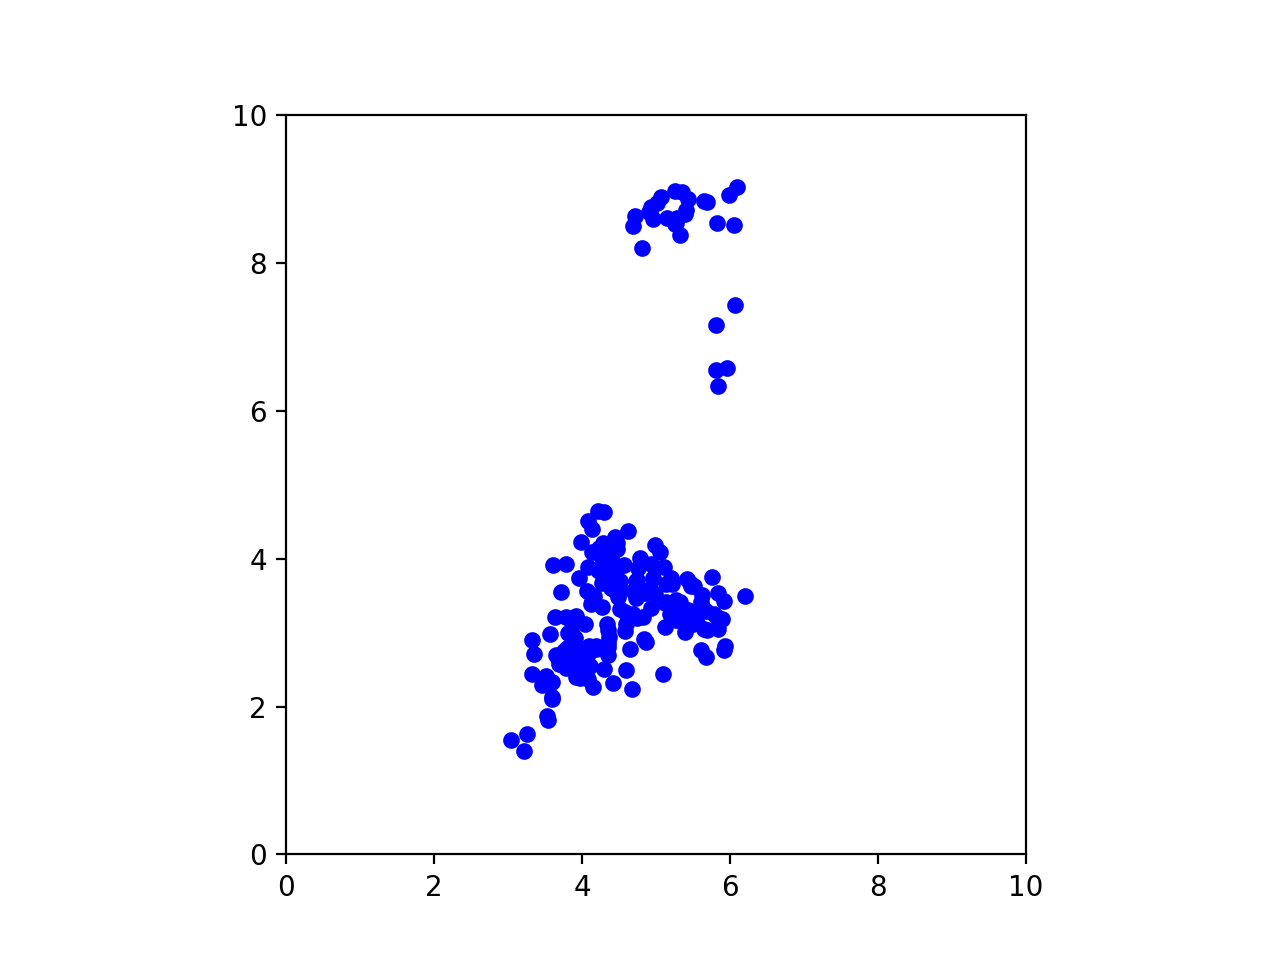

In [3]:
N=200
L=10
eta=0.1
v=1
r=0.5
Dt=1
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
#flock_to_image(fl)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
line, = ax.plot([], [], 'bo', ms=5)
ax.set_xlim(0, fl.L)
ax.set_ylim(0, fl.L)

def make_frame(t):
    fl.make_step()
    x = fl.positions[:,0]
    y = fl.positions[:,1]
    line.set_data(x, y)
    return line,
animation.FuncAnimation(fig, make_frame, interval=20, blit=False)

In [ ]:
"""

def flock_to_image(flock):
    fig = plt.figure()    
    plt.axis([0,flock.L,flock.L,0])
    #im=plt.quiver(flock.positions[:,0],flock.positions[:,1],flock.velocities[:,0],flock.velocities[:,1], alpha=.5)
    im=plt.quiver([],[],[],[], alpha=.5)
    def make_frame(t):
        flock.make_step()
        x = flock.positions[:,0]
        y = flock.positions[:,1]
        vx = flock.velocities[:,0]
        vy = flock.velocities[:,1]
        im.set_data(x, y, vx, vy)
        return im
animation.FuncAnimation(fig, make_frame, interval=20, blit=False)
"""

In [ ]:
"""N=100
L=10
eta=0.1
v=1
r=0.5
Dt=1
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
flock_to_image(fl)"""

In [ ]:
for i in range(100):
    fl.make_step()
flock_to_image(fl)




In [ ]:

A=np.array([3,4])%1.6
print(A)

In [ ]:
theta = npr.uniform(0.,2*np.pi,3)
vel0=np.zeros((3,2))
vel0[:,0]=np.cos(theta)
vel0[:,1]=np.sin(theta)
print (vel0)
print("pos",npr.uniform(0,L,size=(2,3)))
